In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
print(len(X))
y = 4 + 3 * X + np.random.randn(100,1)
print (len(y))

import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

100
100


<Figure size 640x480 with 1 Axes>

In [11]:
# computing \Theta by the Normal equation

X_b = np.c_[np.ones((100,1)), X] 
# add x0 =1 to each instance which is the bias
# why are we adding bias to all ?
print(X_b[1].shape)

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

# ideal values are 4 and 3 but its close but the noise made
# it impossible

(2,)
[[3.89335721]
 [3.03985937]]


In [8]:
# making predictions with theta new

X_new = np.array([[0],[2]])
# what is X_new
# is it randomly taken test value ?

print(X_new)
print(np.ones((2,1)))
X_new_b = np.c_[np.ones((2,1)), X_new]
# why do we add bias once more

print(X_new_b)
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0]
 [2]]
[[1.]
 [1.]]
[[1. 0.]
 [1. 2.]]
[[3.89335721]
 [9.97307595]]


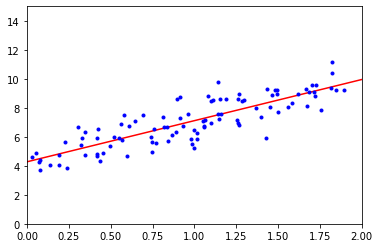

In [13]:
# plotting the predictions
plt.plot(X_new, y_predict,"r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

[4.27647502] [[2.83859985]]


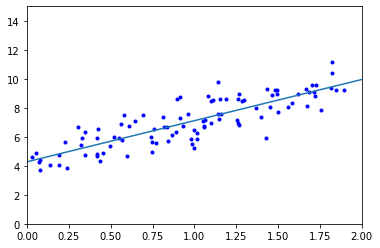

In [17]:
# equivalent code in scikitlearn for linear regression
from sklearn.linear_model import LinearRegression
# based on moore penrose inverse

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)
y_new = lin_reg.predict(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new,y_new)
plt.axis([0,2,0,15])
plt.show()

### Batch gradient descent

In [18]:
# Exploring gradient descent

eta =0.1 # learning rate
n_iterations =1000
m =1000

theta = np.random.randn(2,1) # random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta * gradients

In [19]:
theta
# expected 4 and 3

array([[4.26004224],
       [2.85342362]])

[[0.74587926]
 [3.99644817]] [[0.66732668]
 [3.75428823]] [[1.13864217]
 [5.20724784]]
[[0.74587926]
 [1.62528445]] [[0.66732668]
 [1.54348078]] [[1.13864217]
 [2.03430283]]


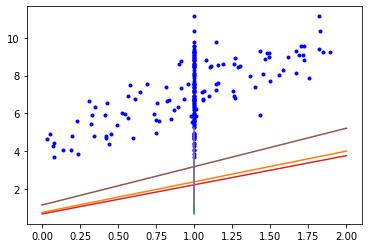

In [30]:
# trying using different learning rates

eta1 = 0.1
eta2 = 0.02
eta3 = 0.5

theta = np.random.randn(2,1)
#print(X_b)

plt.plot(X_b, y, "b.")

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta1 = theta - eta1 * gradients
    theta2 = theta - eta2 * gradients
    theta3 = theta - eta3 * gradients
    
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred1 = X_new_b.dot(theta1)
y_pred2 = X_new_b.dot(theta2)
y_pred3 = X_new_b.dot(theta3)
print(y_pred1, y_pred2, y_pred3)
print(theta1,theta2,theta3)
    

plt.plot(X_new_b, y_pred1)
plt.plot(X_new_b, y_pred2)
plt.plot(X_new_b, y_pred3)

plt.show()

### Plotting batch gradient descent

In [32]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y,"b.")
    n_iterations =1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
        plt.xlabel("$x_1$", fontsize=18)
        plt.axis([0,2,0,15])
        plt.title(r"$\eta = {}$".format(eta), fontsize=16)
        
    print("Theta for {}: ".format(eta), theta)
        

Theta for 0.02:  [[3.89293872]
 [3.04023066]]
Theta for 0.1:  [[3.89335721]
 [3.03985937]]
Theta for 0.5:  [[-6.14952559e+25]
 [-6.93138359e+25]]


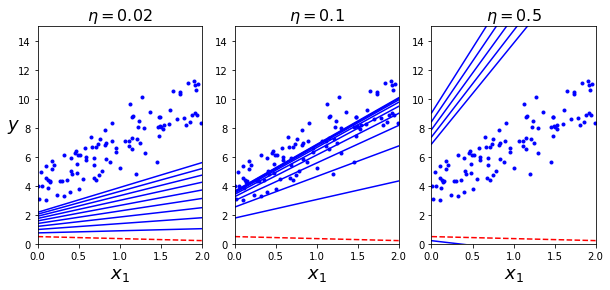

In [33]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()

In [33]:
print(theta_path_bgd)

[array([[1.83228097],
       [1.31271757]]), array([[2.6182189 ],
       [2.15513242]]), array([[3.08294564],
       [2.64217338]]), array([[3.35989702],
       [2.92174257]]), array([[3.52702419],
       [3.08023547]]), array([[3.62986635],
       [3.16811788]]), array([[3.69502879],
       [3.21486705]]), array([[3.73805639],
       [3.23769959]]), array([[3.76803282],
       [3.24667004]]), array([[3.79026736],
       [3.2476492 ]]), array([[3.80786435],
       [3.24406396]]), array([[3.82264001],
       [3.23791364]]), array([[3.83565804],
       [3.2303637 ]]), array([[3.84754249],
       [3.22209255]]), array([[3.85866049],
       [3.21349414]]), array([[3.86922906],
       [3.20479631]]), array([[3.87937744],
       [3.19612991]]), array([[3.88918355],
       [3.18756922]]), array([[3.89869526],
       [3.17915547]]), array([[3.90794284],
       [3.17091071]]), array([[3.91694621],
       [3.16284576]]), array([[3.9257192 ],
       [3.15496498]]), array([[3.93427203],
       [3.

### Stochastic Gradient Descent

In [6]:
n_epochs= 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

# t is given by epoch * m + m(i)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.88851302]
 [3.04932794]]


In [7]:
theta_path_sgd =[]
m = len(X_b)
np.random.seed(42)

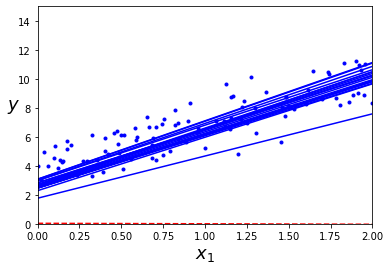

In [23]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i <20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i >0 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index +1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [25]:
# performing linear regression with scikit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.89926409] [3.07849444]


### Mini-batch gradient descent

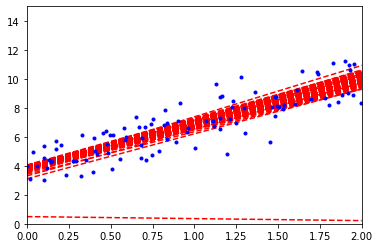

In [30]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0,t1 = 200,1000
def learning_schedule(t):
    return t0 / (t+t1)
t =0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m , minibatch_size):
        t += 1
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r--")
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/ minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [31]:
print(theta)

[[3.79252045]
 [2.91792235]]


In [34]:
# utilising theta_path which we calculated for all three
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

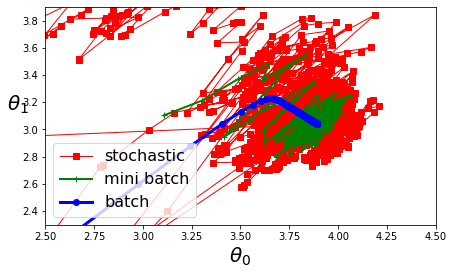

In [39]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], "r-s",linewidth=1, label="stochastic" )
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], "g-+", linewidth=2, label="mini batch")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], "b-o", linewidth=3, label="batch")
plt.legend(fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5,4.5,2.3,3.9])
plt.show()

### Polynomial Regression

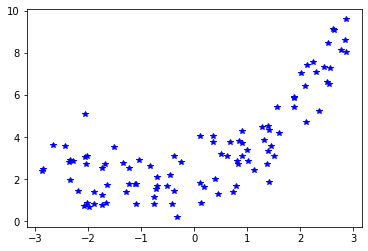

In [6]:
import numpy as np
import matplotlib.pyplot as plt

m =100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X,y, "b*")
plt.show()

In [7]:
# using scikit learn's PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

# X_Poly now contains the original feature plus the square of this feature

array([-2.33828326,  5.46756861])

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

#original values - 2 , 1, 0.5

(array([2.00385573]), array([[0.91084666, 0.49272529]]))

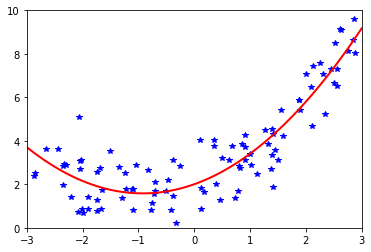

In [14]:
# plotting polynomial regression
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,"b*")
plt.plot(X_new,y_new, "r-", linewidth=2, label="Predictions")
plt.axis([-3,3,0,10])
plt.show()

In [19]:
print(np.linspace(-3,3,10).reshape(10,1))


[[-3.        ]
 [-2.33333333]
 [-1.66666667]
 [-1.        ]
 [-0.33333333]
 [ 0.33333333]
 [ 1.        ]
 [ 1.66666667]
 [ 2.33333333]
 [ 3.        ]]


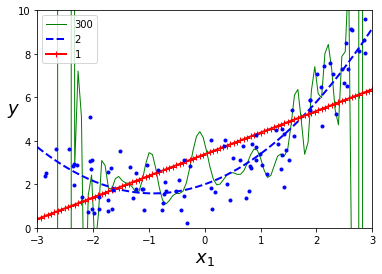

In [21]:
# using a 300degree polynomial curve on fitting above data

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    # trying to fit a 300 degree feature
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
        
    ])
    
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$",rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

### Learning curves

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X,y):
    X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict ))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(fontsize =14)
    plt.xlabel("training set size", fontsize=14)
    plt.ylabel("RMSE",fontsize=14)

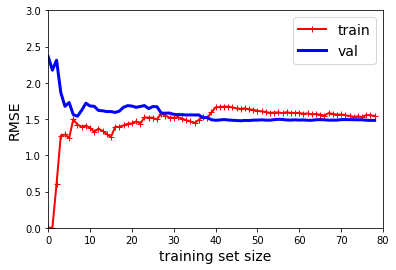

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)
plt.axis([0,80,0,3])
plt.show()

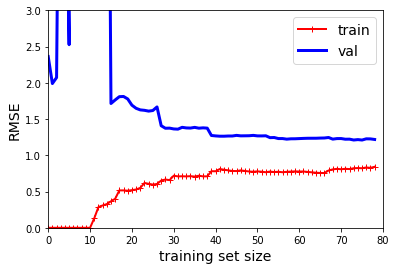

In [27]:
# using a curve of degree 10

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])
plt.show()

In [16]:
# Regularised linear models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Ridge Regression

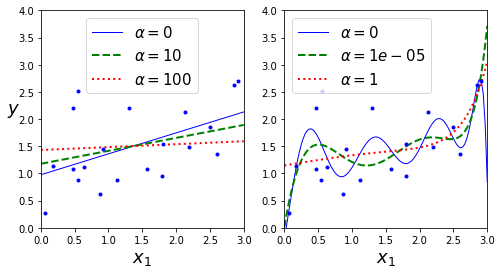

In [20]:
from sklearn.linear_model import Ridge, LinearRegression



np.random.seed(42)
m =20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha, style in zip(alphas, ("b-","g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model)
            ])
            
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0  else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,3,0,4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0,10,100),random_state=42 )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge,polynomial=True, alphas=(0,10**-5, 1), random_state=42)
plt.show()

In [22]:
# using ridge in closed form using a matrix factorisation technique

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [31]:
# using stochastic gradient descent
# l2 indicates that we need to include a regularisation term
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())

a = np.array([[[3],[4]]])
print(a.ravel()) # flattens all dimensions
sgd_reg.predict([[1.5]])

[3 4]


array([1.46571323])

In [24]:
# ridge sag solver
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

### lasso

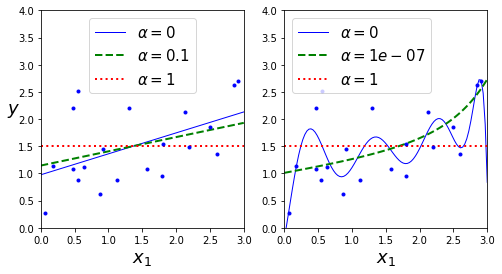

In [25]:


from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0,0.1,1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0,10**-7, 1), tol=1, random_state=42)
plt.show()

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic net

In [27]:

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

### early stopping plot

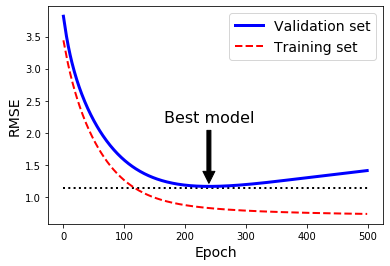

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) -3
y = 2 + X+ 0.5 * X**2 + np.random.randn(m,1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                      penalty =None,
                      eta0=0.0005,
                      warm_start=True,
                      learning_rate="constant",
                      random_state=42)
n_epochs =500
train_errors, val_errors = [],[]
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

#     adding it will create a graph of how the value is generated epoch by epoch
#     its interesting
#     best_epoch = np.argmin(val_errors)
#     best_val_rmse = np.sqrt(val_errors[best_epoch])
    
#     plt.annotate('Best model',
#                  xy=(best_epoch, best_val_rmse),
#                 xytext=(best_epoch, best_val_rmse + 1),
#                 ha="center",
#                 arrowprops=dict(facecolor='black', shrink=0.05),
#                 fontsize=16)
#     best_val_rmse -=0.03 # apparently makes graph look better
    
#     plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
#     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
#     plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
#     plt.legend(fontsize=14)
#     plt.xlabel("Epoch", fontsize=14)
#     plt.ylabel("RMSE", fontsize=14)
#     plt.show()

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])
    
plt.annotate('Best model',
                 xy=(best_epoch, best_val_rmse),
                xytext=(best_epoch, best_val_rmse + 1),
                ha="center",
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=16)
best_val_rmse -=0.03 # apparently makes graph look better
    
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [40]:
# early stopping
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        

In [41]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [49]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

#ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(),t2.ravel()]
Xr = np.array([[-1,1], [-0.3,-1], [1,0.1]])
yr = 2 * Xr[:,:1] + 0.5 * Xr[:,1:]

J = (1/len(Xr)) * np.sum((T.dot(Xr.T) - yr.T) **2, axis=1).reshape(t1.shape)
N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

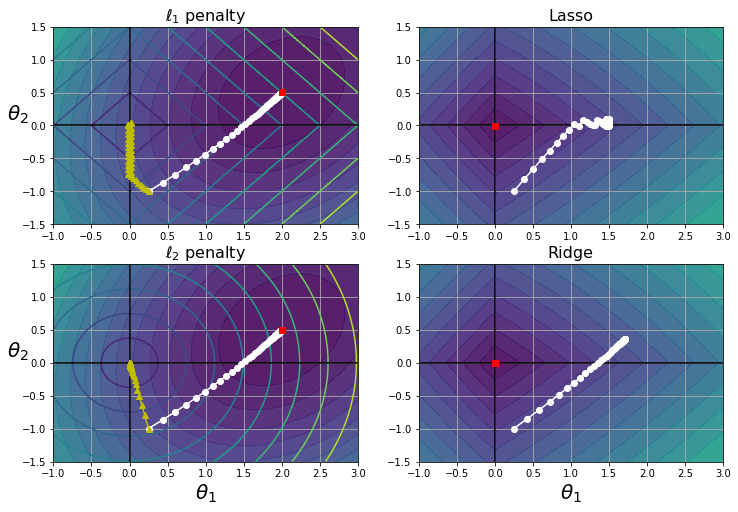

In [53]:
def bgd_path(theta, X,y, l1, l2, core=1, eta=0.1, n_iterations=50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta)-y) + l1 * np.sign(theta) + 2 * l2 * theta
        
        theta = theta -eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12,8))

for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2,0,0.1,"Ridge")):
    JR = J + 11 * N1 + l2 * N2 ** 2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]
    
    levelsJ = (np.exp(np.linspace(0,1,20))-1) * (np.max(J) - np.min(J)) + np.min(J) 
    levelsJR = (np.exp(np.linspace(0,1,20)) - 1) * (np.max(JR) - np.min(JR)) +np.min(JR)
    levelsN = np.linspace(0,np.max(N),10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)
    
    plt.subplot(221 + i *2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1,t2,N,levels=levelsN)
    plt.plot(path_J[:,0], path_J[:,1], "w-o")
    plt.plot(path_N[:,0], path_N[:,1], "y-^")
    plt.plot(t1_min,t2_min,"rs")
    plt.title(r"$\ell_{}$ penalty".format(i+1), fontsize=16)
    plt.axis([t1a, t1b,t2a,t2b])
    if i==1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)
    
    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:,0], path_JR[:,1], "w-o")
    plt.plot(t1r_min, t2r_min,"rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i ==1:
        plt.xlabel(r"$\theta_1$",fontsize=20)

plt.show()

### Logistic regression

range(-10, 11)
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


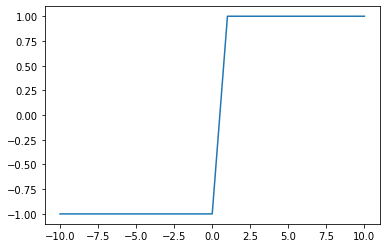

In [47]:
#sigmoid function
# squarish
X = range(-10,11)
y = [1 if x > 0 else -1 for x in X]
print(X)
print(y)

plt.plot(X,y)
plt.show()

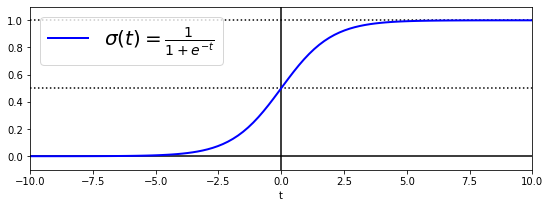

In [54]:
t = np.linspace(-10,10,100)
sig= 1/(1 + np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10], [0,0],  "k-")
plt.plot([-10,10], [0.5,0.5], "k:")
plt.plot([-10,10], [1,1], "k:")
plt.plot([0,0], [-1.1,1.1], "k-")
plt.plot(t,sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10,10,-0.1,1.1])
plt.show()

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


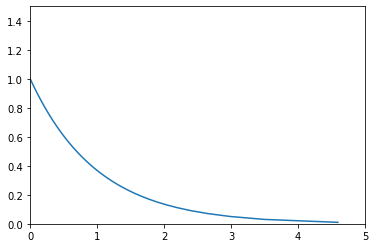

In [65]:
t = np.linspace(-1,1,100)
log_fun = -np.log(t)

plt.plot(log_fun, t)
plt.axis([0,5,0,1.5])
plt.show()

### Decision boundaries

In [3]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:,3:]
y = (iris["target"] ==2).astype(np.int)

In [18]:
print(list(iris.keys()))
print(iris["data"][:,3:])

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2

In [8]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

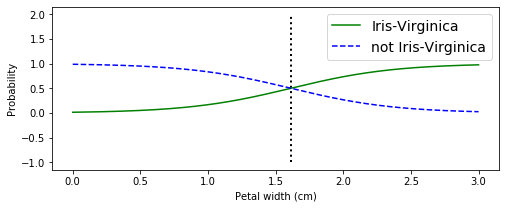

In [21]:
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0]
plt.figure(figsize=(8,3))
plt.plot([decision_boundary, decision_boundary], [-1,2], "k:",linewidth=2)
plt.plot(X_new,y_proba[:,1],"g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--",label="not Iris-Virginica")
plt.legend(fontsize=14)
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.show()

In [22]:
decision_boundary

array([1.61561562])

In [23]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

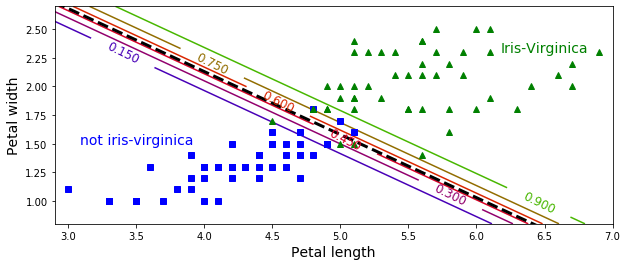

In [27]:
#using two features instead of one
# very complex

X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.int)

#instead of alpha the hyperparameter used here is C
# for regularisation

log_reg = LogisticRegression(solver="liblinear",C=10**10, random_state=42)
log_reg.fit(X,y)

x0,x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1,1),
    np.linspace(0.8, 2.7,200).reshape(-1,1)
)

X_new = np.c_[x0.ravel(),x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0], X[y==0,1], "bs")
plt.plot(X[y==1,0], X[y==1,1], "g^")

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz,cmap=plt.cm.brg)

left_right = np.array([2.9,7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour,inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5,1.5,"not iris-virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g",ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9,7,0.8,2.7])
plt.show()

### Softmax

In [28]:
# classifying into all three classes

X = iris["data"][:,(2,3)] # petalwidth and petal length
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))


[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


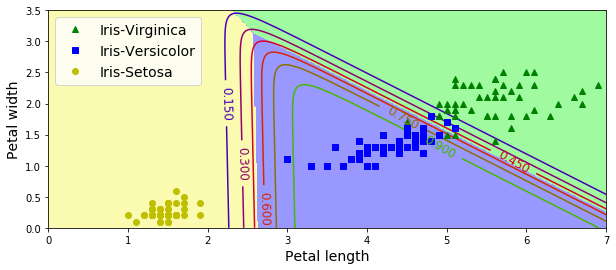

In [32]:
# plotting the complex graph across the featurespace
# softmax regression contour map
# complex !

x0, x1 = np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0], X[y==2,1], "g^", label="Iris-Virginica")
plt.plot(X[y==1,0], X[y==1,1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0,0], X[y==0,1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

plt.contourf(x0,x1,zz, cmap=custom_map)
contour = plt.contour(x0, x1,zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=14)
plt.axis([0,7,0,3.5])
plt.show()